In [1]:
from email.mime.text import MIMEText # 导入生成纯文本邮件对象的函数
from email.header import Header #导入生成邮件主题的函数
from email.mime.multipart import MIMEMultipart #导入可以生成混合型邮件对象的函数
import smtplib #导入发送邮件的库

import pymysql
import pandas as pd
import xlwings as xw

import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["simhei"]
plt.rcParams["axes.unicode_minus"] = False

import time

In [2]:
conn = pymysql.connect(user="root" #数据库的用户名
               ,password = "1234" #数据库的登录密码
               ,host = "localhost" #数据库的服务器地址
               ,port = 3306 #数据库的端口号
               ,charset = "utf8" #数据库的编码格式
               ,database = "cda" #链接到哪个数据库
               )
sql_1 = "select * from daily_report;"
daily = pd.read_sql(sql_1,conn)

C:\Users\EDY\AppData\Local\Temp\ipykernel_40208\1699940256.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  daily = pd.read_sql(sql_1,conn)


In [3]:
conn.close() #关闭python和数据库的连接

In [6]:
daily.head(3)

,日期,总进件,审批量,准入拒绝量,通过量,拒绝量,通过率,批核金额,批核日件均,放款量,放款金额,放款日件均
0,2018-03-01,9,9.0,0.0,7.0,2.0,77.78%,64.3,9.19,7.0,64.3,9.19
1,2018-03-02,4,3.0,1.0,1.0,2.0,33.33%,10.0,10.00,0.0,0.0,0.00
2,2018-03-05,11,10.0,1.0,6.0,4.0,60.00%,52.3,8.72,5.0,29.7,5.94


In [10]:
daily["年月"] = daily["日期"].astype(str).str[:7]

In [17]:
daily["通过率"]=daily["通过率"].str.rstrip("%").astype(float)/100

In [20]:
S = daily.groupby("年月")["通过率"].mean().apply(lambda x :round(x,2))

In [21]:
S

年月
2018-03    0.67
2018-04    0.70
2018-05    0.80
2018-06    0.76
2018-07    0.69
2018-08    0.62
2018-09    0.74
2018-10    0.78
Name: 通过率, dtype: float64

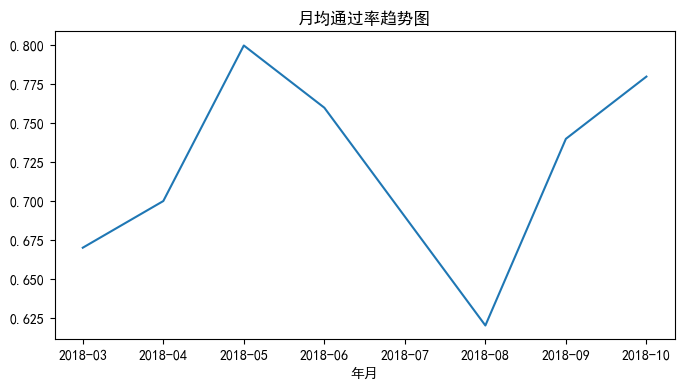

In [25]:
pic_1 = S.plot.line(figsize=(8,4),title="月均通过率趋势图");

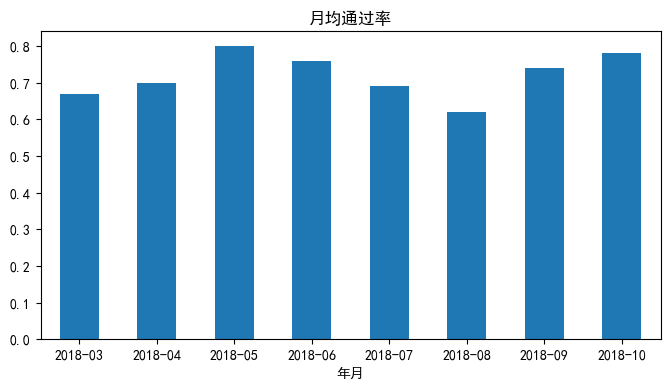

In [27]:
pic_2 = S.plot.bar(figsize=(8,4),title="月均通过率",rot=360);

In [28]:
fig_1 = pic_1.get_figure()
fig_2 = pic_2.get_figure()

In [29]:
S.to_excel(r"D:\data\auto1000\tongguolv.xlsx")

In [30]:
app = xw.App(visible=False,add_book=False)
book = app.books.open(r"D:\data\auto1000\tongguolv.xlsx")
sheet = book.sheets[0]
sheet.pictures.add(fig_1,top=0,left=150)
sheet.pictures.add(fig_2,top=400,left=150)
book.save()
book.close()
app.quit()

In [32]:
#定义变量接收 ：发件人、收件人、授权码、邮件主题、正文、服务器地址、端口号
user_ = "2941398064@qq.com" #发件人账号
# receiver_ = "2941398064@qq.com" #只有一个收件人时的收件人账号
receivers_ = ["2941398064@qq.com","949194544@qq.com"] #多个收件人
password_ = "gemtszrdmehuddjb" #邮箱的授权码
title_ = "通过率数据" # 邮件标题
text_ = """Dear All:
                    附件时截止到今天的通过率数据，请查收"""#邮件的正文
host_ = "smtp.qq.com" #QQ邮箱的服务器地址
port_ = 465 #端口号

att1 = MIMEText(open(r"D:\data\auto1000\tongguolv.xlsx","rb").read(),"base64","utf-8")
message = MIMEMultipart() #创建混合型邮件对象
message["From"] = user_ # 往邮件对象中添加发件人信息
message["To"] =";".join(receivers_)# 往邮件对象中添加收件人信息
message["Subject"] = Header(s=title_, charset="utf-8")# 往邮件对象中添加主题对象
message.attach(MIMEText(text_,"plain","utf-8"))#往混合型邮件对象中添加正文
message.attach(att1)#往混合型邮件对象中添加附件
att1["Content-Type"] = "application/octer-stream" #八位组流协议
att1["Content-Disposition"] = "attachment;filename=rtongguolv.xlsx" #声明附件信息

smtp = smtplib.SMTP_SSL(host_)
smtp.connect(host_,port_)
smtp.login(user_,password_)
smtp.sendmail(user_,receivers_,message.as_string())

{}